# Question 3 - Does the genre predict the movie gross?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
data_path = os.path.join('zippedData')
files = os.listdir(data_path)
file_paths = ['zippedData/' + file for file in files]

In [3]:
"""Adding files into a DataFrame dictionary so one is able to recognize the file.
The file is the key and the information in the DataFrame is the value"""
df_dict = {}
file_paths = ['zippedData/bom.movie_gross.csv.gz', 'zippedData/imdb.name.basics.csv.gz', 
              'zippedData/imdb.title.akas.csv.gz', 'zippedData/imdb.title.basics.csv.gz', 
              'zippedData/imdb.title.crew.csv.gz', 'zippedData/imdb.title.principals.csv.gz', 
              'zippedData/imdb.title.ratings.csv.gz','zippedData/tmdb.movies.csv.gz', 'zippedData/tn.movie_budgets.csv.gz']
for file in file_paths:
    df_dict[file] = pd.read_csv(file)
rotten_file_paths = ['zippedData/rt.movie_info.tsv.gz', 'zippedData/rt.reviews.tsv.gz']
for file in rotten_file_paths:
    df_dict[file] = pd.read_csv(file, delimiter='\t', encoding='ISO-8859-1')    
print(df_dict)

{'zippedData/bom.movie_gross.csv.gz':                                             title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          

In [4]:
"""Renaming the DataFrame genre"""
genre = df_dict['zippedData/imdb.title.basics.csv.gz']

"""Renaming the DataFrame rating"""
rating = df_dict['zippedData/imdb.title.ratings.csv.gz']

"""Merging the DataFrames genre and rating into a DataFrame called ratings"""
ratings = pd.merge(genre, rating, on = 'tconst')
ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [5]:
"""Drop the NaN values within the genres and averagerating columns"""
ratings = ratings.dropna(subset = ['genres', 'averagerating'])

In [6]:
"""Changing the np array to a string"""
str(ratings['genres'].unique())

"['Action,Crime,Drama' 'Biography,Drama' 'Drama' 'Comedy,Drama'\n 'Comedy,Drama,Fantasy' 'Horror,Thriller' 'Adventure,Animation,Comedy'\n 'History' 'Documentary' 'Animation,Drama,History' 'Drama,Mystery'\n 'Action,Animation,Comedy' 'Crime,Drama' 'Biography,Comedy,Drama'\n 'Action,Drama' 'Documentary,History' 'Sci-Fi' 'Comedy' 'Thriller'\n 'Adventure,Animation,Sci-Fi' 'Drama,Horror' 'Drama,Mystery,Thriller'\n 'Drama,Family' 'Adventure,Comedy,Romance' 'Adventure,Drama,Romance'\n 'Comedy,Crime,Drama' 'Biography' 'Horror' 'Adventure,Comedy,Drama'\n 'Drama,Sci-Fi,Thriller' 'Action' 'Comedy,Drama,Romance'\n 'Action,Adventure,Sci-Fi' 'Comedy,Family' 'Adventure' 'Drama,History,War'\n 'Action,Thriller' 'Comedy,Crime' 'Crime,Drama,Thriller'\n 'Action,Sci-Fi,Thriller' 'Fantasy' 'Drama,Mystery,Sci-Fi'\n 'Biography,Drama,History' 'Action,Comedy,Crime'\n 'Action,Adventure,Thriller' 'Horror,Mystery,Thriller'\n 'Action,Drama,Family' 'Comedy,Drama,Music' 'Drama,Fantasy,Horror'\n 'Drama,Romance,Sci-Fi' 

In [7]:
"""Cleaning the previous list"""
clean = str(ratings['genres'].unique()).replace("[","").replace("]","").replace("\n", "").replace("'", "").replace(" ", ",").split(",")
print(clean)

['Action', 'Crime', 'Drama', 'Biography', 'Drama', 'Drama', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Comedy', 'History', 'Documentary', 'Animation', 'Drama', 'History', 'Drama', 'Mystery', 'Action', 'Animation', 'Comedy', 'Crime', 'Drama', 'Biography', 'Comedy', 'Drama', 'Action', 'Drama', 'Documentary', 'History', 'Sci-Fi', 'Comedy', 'Thriller', 'Adventure', 'Animation', 'Sci-Fi', 'Drama', 'Horror', 'Drama', 'Mystery', 'Thriller', 'Drama', 'Family', 'Adventure', 'Comedy', 'Romance', 'Adventure', 'Drama', 'Romance', 'Comedy', 'Crime', 'Drama', 'Biography', 'Horror', 'Adventure', 'Comedy', 'Drama', 'Drama', 'Sci-Fi', 'Thriller', 'Action', 'Comedy', 'Drama', 'Romance', 'Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Family', 'Adventure', 'Drama', 'History', 'War', 'Action', 'Thriller', 'Comedy', 'Crime', 'Crime', 'Drama', 'Thriller', 'Action', 'Sci-Fi', 'Thriller', 'Fantasy', 'Drama', 'Mystery', 'Sci-Fi', 'Biography', 'Drama', 'History

In [8]:
"""No duplicates in the set method"""
clean_set_genres = set(clean)
print(clean_set_genres)

{'Music', 'Western', 'Short', 'Reality-TV', 'Animation', 'Family', 'Sport', 'History', 'Fantasy', 'Biography', 'War', 'Romance', 'Adventure', 'Game-Show', 'Documentary', 'Mystery', 'Adult', 'Musical', 'Horror', 'Crime', 'News', 'Comedy', 'Action', 'Sci-Fi', 'Drama', 'Thriller'}


In [9]:
"""Alphabetize the set so the bar graph will be easier to follow"""
clean_set_genres = sorted(clean_set_genres)

In [10]:
movie_gross = df_dict['zippedData/bom.movie_gross.csv.gz']

In [11]:
movie_gross = movie_gross.dropna(subset = ['domestic_gross', 'foreign_gross'])

In [12]:
"""foreign_gross Dtype is an object so it's being converted into a float to concat with domestic_gross"""
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].apply(lambda x: float(x.replace(',','')))
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.2+ KB


In [13]:
movie_gross['total_gross'] = movie_gross['domestic_gross'] + movie_gross['foreign_gross']
movie_gross['total_gross'] = movie_gross['total_gross'].sort_values(ascending = False)
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [14]:
"""referencing earlier table before merging"""
ratings.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [15]:
"""combine ratings and movie gross on title and primary title"""
master_table = pd.merge(movie_gross, ratings, left_on = 'title', right_on = 'primary_title')
master_table.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [16]:
master_table.dropna(subset = ['total_gross', 'domestic_gross', 'foreign_gross'])

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.191000e+06,tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854
1799,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06,tt2160105,I Still See You,I Still See You,2018,98.0,"Fantasy,Thriller",5.7,5010
1800,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05,tt4602066,The Catcher Was a Spy,The Catcher Was a Spy,2018,98.0,"Biography,Drama,War",6.2,4653
1801,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05,tt6769280,Time Freak,Time Freak,2018,104.0,"Comedy,Drama,Romance",5.7,3455


In [17]:
"""Isolating the genres and total_gross columns for a better visual"""
master_table.groupby(['title'])['genres','total_gross'].head()

,genres,total_gross
0,"Adventure,Animation,Comedy",1.067000e+09
1,"Action,Adventure,Sci-Fi",8.283000e+08
2,"Adventure,Animation,Comedy",7.526000e+08
3,"Adventure,Drama,Fantasy",6.985000e+08
4,"Action,Adventure,Sci-Fi",6.239000e+08
...,...,...
1798,"Action,Adventure,Animation",2.191000e+06
1799,"Fantasy,Thriller",1.501400e+06
1800,"Biography,Drama,War",9.540000e+05
1801,"Comedy,Drama,Romance",2.660000e+05


In [18]:
"""Making a dictionary for genre (key) and total_gross(value)"""
genre_gross_dict = {}
for genre in list(clean_set_genres):
    genre_gross_dict[genre] = master_table[master_table['genres'].str.contains(genre)]['total_gross'].mean()
print(genre_gross_dict)
# len(genre_gross_dict)

{'Action': 228580495.80797413, 'Adult': nan, 'Adventure': 324234100.2225543, 'Animation': 314966085.3333333, 'Biography': 79938013.74375, 'Comedy': 126619169.35761589, 'Crime': 78411830.33744855, 'Documentary': 69982330.20930232, 'Drama': 70670326.93578948, 'Family': 159709739.5348837, 'Fantasy': 212827206.19379845, 'Game-Show': nan, 'History': 69395993.7125, 'Horror': 94520861.0062893, 'Music': 82226437.5, 'Musical': 128573430.0, 'Mystery': 88432505.24812031, 'News': 64600000.0, 'Reality-TV': nan, 'Romance': 61288581.9372549, 'Sci-Fi': 341761280.4238938, 'Short': nan, 'Sport': 123521465.71428572, 'Thriller': 118957435.16780822, 'War': 38600845.0, 'Western': 106332918.18181819}


TypeError: 'list' object cannot be interpreted as an integer

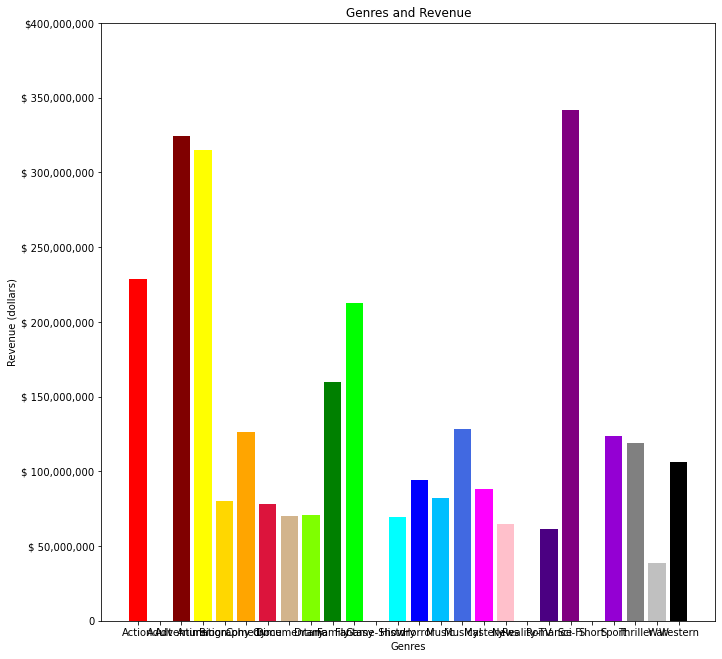

In [19]:
fig, ax = plt.subplots(figsize = (11,11))
x = genre_gross_dict.keys()
y = genre_gross_dict.values()
# color = ["tan", "lime", "orangered", "maroon", "gold", "chartreuse", "lavender", "fuchsia", "darkviolet", "grey", 
#          "deepskyblue", "orange", "purple", "red", "deeppink", "royalblue", "pink", "turquoise", "blue", "indigo", "cyan",
#         "black", "green", "yellow", "silver", "crimson"]
color = ["red", "orangered", "maroon", "yellow", "gold", "orange", "crimson", "tan", "chartreuse", "green", "lime", 
         "turquoise", "cyan", "blue", "deepskyblue", "royalblue", "fuchsia", "pink", "deeppink", "indigo", "purple", 
         "lavender", "darkviolet", "grey", "silver", "black"] 
plt.bar(x, y, color = color)

ax.set_title('Genres and Revenue');
ax.set_xlabel('Genres')
ax.set_ylabel('Revenue (dollars)')
ax.set_ylim(0, 400000000)
ax.set_yticklabels(['0', '$ 50,000,000', '$ 100,000,000', '$ 150,000,000', '$ 200,000,000','$ 250,000,000',
                    '$ 300,000,000', '$ 350,000,000', '$400,000,000'])
alphabetize_genres = []
for index in range(clean_set_genres):
    alphabetize_genres.append(clean_set_genres[index])
ax.set_xticklabels([aplphabetize_genres], rotation = 'vertical')

plt.savefig('gross_genres_branchq3')

In [21]:
master_table.loc[(master_table['genres']) == 'Short']

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


In [22]:
master_table.loc[(master_table['genres']) == 'Action']

,title,studio,domestic_gross,foreign_gross,year,total_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
337,War of the Arrows,CJ,251000.0,45800000.0,2011,46051000.0,tt2025526,War of the Arrows,Choi-jong-byeong-gi hwal,2011,122.0,Action,7.2,10214
598,Rowdy Rathore,UTV,777000.0,28600000.0,2012,29377000.0,tt2077833,Rowdy Rathore,Rowdy Rathore,2012,140.0,Action,5.9,18953
611,The Man with the Iron Fists,Uni.,15600000.0,4099999.0,2012,19699999.0,tt1258972,The Man with the Iron Fists,The Man with the Iron Fists,2012,95.0,Action,5.4,58185
869,Fists of Legend,CJ,134000.0,5300000.0,2013,5434000.0,tt2828840,Fists of Legend,Jeonseolui joomeok,2013,154.0,Action,6.9,966
941,Ride Along,Uni.,134900000.0,19500000.0,2014,154400000.0,tt2263520,Ride Along,Ride Along,2012,87.0,Action,4.4,14
1066,The Protector 2,Magn.,2500.0,3300000.0,2014,3302500.0,tt1925518,The Protector 2,Tom yum goong 2,2013,104.0,Action,5.3,6142
1265,Trash,FCW,17500.0,4800000.0,2015,4817500.0,tt1846800,Trash,Trash,2010,NaN,Action,7.2,8
1309,Dangal,UTV,12400000.0,290500000.0,2016,302900000.0,tt5911540,Dangal,Dangal,2013,NaN,Action,4.1,20
1355,The Little Prince,EOne,1300000.0,96200000.0,2016,97500000.0,tt10075374,The Little Prince,The Little Prince,2019,93.0,Action,8.3,6
1560,Confidential Assignment,CJ,476000.0,55500000.0,2017,55976000.0,tt5606538,Confidential Assignment,Gongjo,2017,125.0,Action,6.5,1828


In [23]:
"""Converting the genre_rating_dict into a DataFrame"""
genre_gross_dict = pd.DataFrame(list(genre_gross_dict.items()), columns = ['genres', 'total_gross'])
genre_gross_dict.head(26)

,genres,total_gross
0,Action,2.285805e+08
1,Adult,NaN
2,Adventure,3.242341e+08
3,Animation,3.149661e+08
4,Biography,7.993801e+07
5,Comedy,1.266192e+08
6,Crime,7.841183e+07
7,Documentary,6.998233e+07
8,Drama,7.067033e+07
9,Family,1.597097e+08


In [24]:
"""Isolating the genres and total_gross columns for a better visual"""
master_df = master_table.groupby(['title'])['title','genres','total_gross'].head()
master_df.head()

,title,genres,total_gross
0,Toy Story 3,"Adventure,Animation,Comedy",1.067000e+09
1,Inception,"Action,Adventure,Sci-Fi",8.283000e+08
2,Shrek Forever After,"Adventure,Animation,Comedy",7.526000e+08
3,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",6.985000e+08
4,Iron Man 2,"Action,Adventure,Sci-Fi",6.239000e+08


In [51]:
genre_gross_dict.loc[(genre_gross_dict['genres']) == 'Short']

,genres,total_gross
21,Short,NaN


In [52]:
genre_gross_dict.loc[(genre_gross_dict['genres']) == 'Action']

,genres,total_gross
0,Action,2.285805e+08


In [53]:
genre_gross_dict.loc[(genre_gross_dict['genres']) == 'Adult']

,genres,total_gross
1,Adult,NaN


In [54]:
genre_gross_dict.loc[(genre_gross_dict['genres']) == 'Adventure']

,genres,total_gross
2,Adventure,3.242341e+08


In [29]:
master_df.loc[(master_df['genres']) == 'Animation']

,title,genres,total_gross
912,Noah,Animation,362599999.0
1576,The House,Animation,34200000.0


In [55]:
genre_gross_dict.loc[(genre_gross_dict['genres']) == 'Animation']

,genres,total_gross
3,Animation,3.149661e+08


In [30]:
master_df.loc[(master_df['genres']) == 'Biography']

,title,genres,total_gross


In [31]:
master_df.loc[(master_df['genres']) == 'Comedy']

,title,genres,total_gross
25,Grown Ups,Comedy,271400000.0
69,Dinner for Schmucks,Comedy,86800000.0
73,Vampires Suck,Comedy,80600000.0
89,Remember Me,Comedy,56100000.0
174,Twelve,Comedy,2584000.0
177,Housefull,Comedy,2400000.0
192,We Are Family,Comedy,1031000.0
193,We Are Family,Comedy,1031000.0
203,The Extra Man,Comedy,457500.0
276,Jack and Jill,Comedy,149700000.0


In [32]:
master_df.loc[(master_df['genres']) == 'Documentary']

,title,genres,total_gross
41,Unstoppable,Documentary,167800000.0
43,Unstoppable,Documentary,167800000.0
123,Another Year,Documentary,19700000.0
128,Sea Rex 3D: Journey to a Prehistoric World,Documentary,16000000.0
134,The Last Station,Documentary,13500000.0
146,Babies,Documentary,9500000.0
213,Waste Land,Documentary,276700.0
216,Client 9: The Rise and Fall of Eliot Spitzer,Documentary,192500.0
218,Freakonomics,Documentary,117400.0
222,GasLand,Documentary,49400.0


In [33]:
master_df.loc[(master_df['genres']) == 'Drama']

,title,genres,total_gross
35,Red,Drama,199000000.0
36,Red,Drama,199000000.0
50,Wall Street: Money Never Sleeps,Drama,134800000.0
67,Burlesque,Drama,89500000.0
104,For Colored Girls,Drama,37717300.0
...,...,...,...
1766,Upgrade,Drama,14400000.0
1775,The Bookshop,Drama,11500000.0
1777,Gringo,Drama,11000000.0
1796,Wildlife,Drama,3100000.0


In [34]:
master_df.loc[(master_df['genres']) == 'Family']

,title,genres,total_gross
178,Housefull,Family,2400000.0
327,One Day,Family,59300000.0
1104,Inside Out,Family,857600000.0


In [35]:
master_df.loc[(master_df['genres']) == 'Fantasy']

,title,genres,total_gross
684,I Wish,Fantasy,1546000.0


In [36]:
master_df.loc[(master_df['genres']) == 'Game-Show']

,title,genres,total_gross


In [37]:
master_df.loc[(master_df['genres']) == 'History']

,title,genres,total_gross


In [38]:
master_df.loc[(master_df['genres']) == 'Horror']

,title,genres,total_gross
37,Paranormal Activity 2,Horror,177600000.0
56,Tooth Fairy,Horror,112400000.0
116,Let Me In,Horror,24100000.0
166,Monsters,Horror,4237000.0
223,Bluebeard,Horror,38700.0
271,Final Destination 5,Horror,157900000.0
355,The Sitter,Horror,34900000.0
551,The Devil Inside,Horror,101800000.0
570,The Cabin in the Woods,Horror,66500000.0
830,Trance,Horror,24200000.0


In [39]:
master_df.loc[(master_df['genres']) == 'Music']

,title,genres,total_gross
861,Metallica Through the Never,Music,8000000.0


In [40]:
master_df.loc[(master_df['genres']) == 'Musical']

,title,genres,total_gross


In [41]:
master_df.loc[(master_df['genres']) == 'Mystery']

,title,genres,total_gross
835,Diana,Mystery,21735000.0


In [42]:
master_df.loc[(master_df['genres']) == 'News']

,title,genres,total_gross


In [43]:
master_df.loc[(master_df['genres']) == 'Reality-TV']

,title,genres,total_gross


In [44]:
master_df.loc[(master_df['genres']) == 'Romance']

,title,genres,total_gross
1709,How Long Will I Love U,Romance,82847000.0


In [45]:
master_df.loc[(master_df['genres']) == 'Sci-Fi']

,title,genres,total_gross
1478,Wonder Woman,Sci-Fi,821900000.0


In [46]:
master_df.loc[(master_df['genres']) == 'Short']

,title,genres,total_gross


In [47]:
master_df.loc[(master_df['genres']) == 'Sport']

,title,genres,total_gross


In [48]:
master_df.loc[(master_df['genres']) == 'Thriller']

,title,genres,total_gross
34,Red,Thriller,199000000.0
125,Buried,Thriller,19100000.0
209,The Girl on the Train,Thriller,305100.0
224,Bluebeard,Thriller,38700.0
285,The Artist,Thriller,133500000.0
614,Gone,Thriller,18100000.0
733,Oblivion,Thriller,286200000.0
795,The Call,Thriller,68600000.0
847,Paranoia,Thriller,13800000.0
929,Into the Woods,Thriller,213100000.0


In [49]:
master_df.loc[(master_df['genres']) == 'War']

,title,genres,total_gross


In [50]:
master_df.loc[(master_df['genres']) == 'Western']

,title,genres,total_gross
